In [ ]:
#The notebook demonstrates a complete AI/ML pipeline using a synthetic dataset that mimics real-world data. 
#It includes data generation, inferential statistics, feature engineering, model training, and evaluation.

In [ ]:
#step 1
#import necessary libraries
#numpy & pandas – for data handling and manipulation.
#matplotlib & seaborn – for data visualization.
#sklearn – provides built-in datasets, preprocessing tools, model-building, and evaluation metrics.
#scipy & statsmodels – help in performing inferential statistics like hypothesis testing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from scipy import stats
import statsmodels.api as sm

np.random.seed(42)

In [ ]:
#step 2
#synthetic data creation
#n_samples=1000: creates 1000 data points (rows).
#n_features=10: generates 10 input features.
#n_informative=6: out of 10, six actually affect the target variable.
#n_redundant=2: these features are combinations of the informative ones (adds some correlation).
#n_classes=2: binary output — perfect for classification tasks.
#random_state=42: ensures you get the same dataset every time you run it.

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,       
    n_features=10,       
    n_informative=6,      
    n_redundant=2,        
    n_classes=2,          
    random_state=42
)

df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
df['Target'] = y

df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,-1.030931,1.391626,0.547274,0.928932,-1.738880,1.250002,1.332551,1.578256,2.124722,-0.318434,0
1,-2.766254,1.247870,-0.303691,1.083145,0.710836,1.968202,-1.794192,2.346422,1.700778,-0.001190,1
2,-0.558987,0.299849,1.527071,0.360442,-1.360209,1.100793,-0.755951,1.331933,2.041105,-0.824404,0
3,-1.350289,-2.046078,-0.614264,0.126459,-0.783923,5.895026,-0.915477,-3.184768,-0.399260,-3.920960,0
4,-0.275754,-0.728495,0.027727,-0.660834,-1.928161,3.544945,1.446944,-1.111662,0.313766,-2.376528,0


In [ ]:
#step 3
#exploratory data analysis 
#look for patterns 
#look for outliers 

In [4]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

df.describe()

Dataset Shape: (1000, 11)

Data Types:
 Feature_1     float64
Feature_2     float64
Feature_3     float64
Feature_4     float64
Feature_5     float64
Feature_6     float64
Feature_7     float64
Feature_8     float64
Feature_9     float64
Feature_10    float64
Target          int32
dtype: object

Missing Values:
 Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Target        0
dtype: int64


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.012153,0.532850,-0.076207,-0.013345,-0.394057,0.711158,-0.024828,0.049511,1.126541,0.005406,0.502000
std,1.240373,1.594241,1.826369,1.022652,1.825996,2.302393,1.052177,1.700289,2.272793,1.783536,0.500246
min,-5.129490,-5.446468,-5.522664,-3.688365,-7.844223,-6.054553,-3.221016,-6.274085,-5.495407,-5.162097,0.000000
25%,-1.804212,-0.534844,-1.408453,-0.704614,-1.579088,-0.863593,-0.737644,-1.080872,-0.401791,-1.204125,0.000000
50%,-1.029265,0.553832,-0.064367,-0.030525,-0.452602,0.469619,-0.060376,0.108569,0.874031,0.190222,1.000000
75%,-0.246030,1.622359,1.200760,0.686883,0.812573,2.292754,0.730339,1.240864,2.593477,1.262667,1.000000
max,3.218202,5.806373,5.526213,3.529055,5.466089,7.826599,2.943048,5.066045,8.826440,5.379806,1.000000


In [ ]:
#step 4
#visualise the code 
#visualise the correlation heatmap

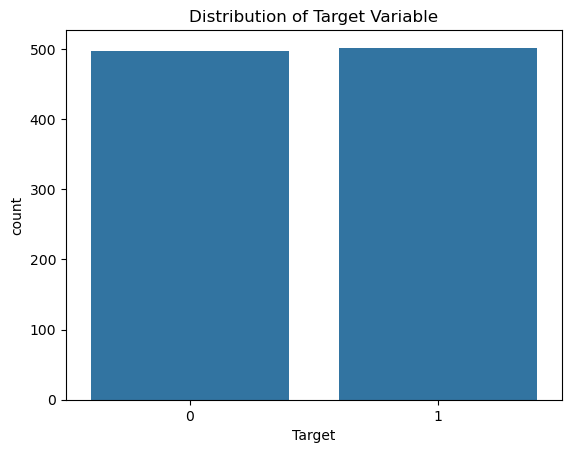

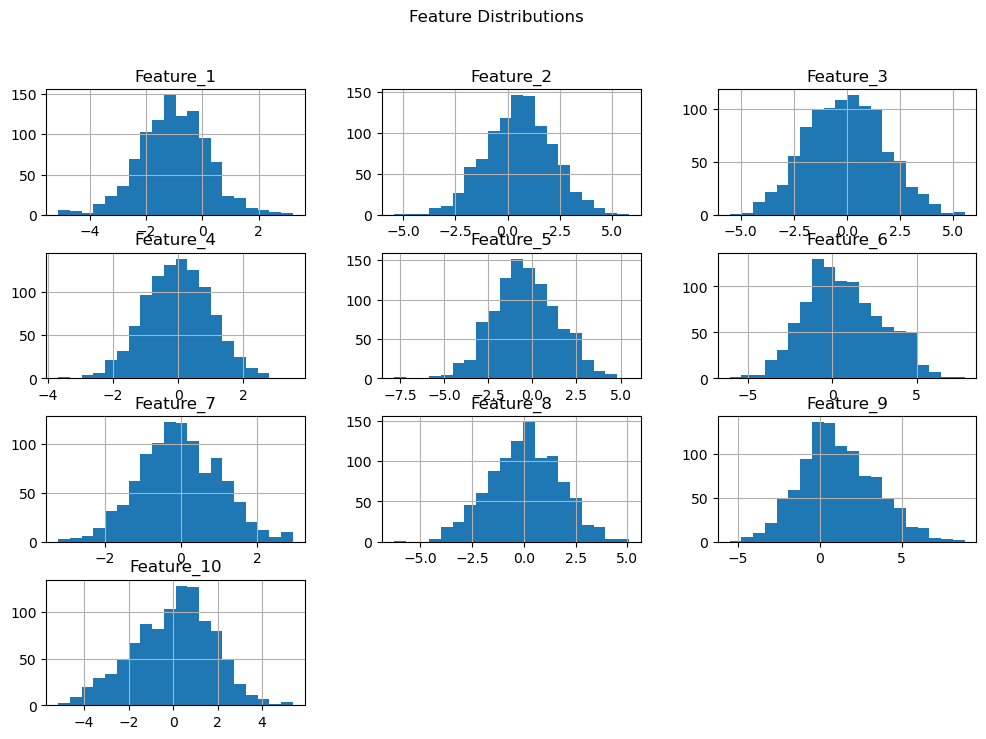

In [5]:
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

df.drop('Target', axis=1).hist(figsize=(12, 8), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

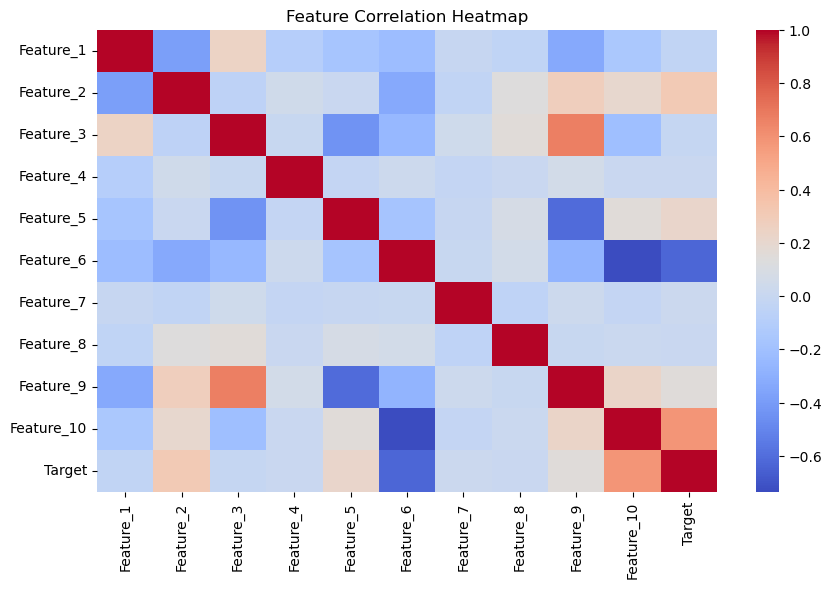

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
#step 5
#inferential statistics 
#helps validate assumptions before building models

In [7]:
# Example 1
t_stat, p_val = stats.ttest_ind(df['Feature_1'], df['Feature_2'])
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_val:.3f}")

# Example 2
corr_coef, corr_p = stats.pearsonr(df['Feature_3'], df['Feature_4'])
print(f"\nCorrelation Coefficient: {corr_coef:.3f}")
print(f"P-Value: {corr_p:.3f}") 

T-Statistic: -24.188
P-Value: 0.000

Correlation Coefficient: -0.003
P-Value: 0.931


In [ ]:
#step 6
#cleaning 
#transforming
#structuring your features before training 

In [8]:
X = df.drop('Target', axis=1)
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,-0.015147,0.538944,0.341548,0.921867,-0.736856,0.234154,1.290713,0.899559,0.439407,-0.181662
1,-1.414880,0.448727,-0.124618,1.072739,0.605393,0.546246,-1.682464,1.351570,0.252783,-0.003700
2,0.365529,-0.146225,0.878289,0.365690,-0.529375,0.169315,-0.695215,0.754615,0.402598,-0.465494
3,-0.272745,-1.618462,-0.294753,0.136776,-0.213616,2.252640,-0.846906,-1.903145,-0.671669,-2.202551
4,0.593988,-0.791584,0.056936,-0.633464,-0.840567,1.231417,1.399488,-0.683269,-0.357790,-1.336180


In [ ]:
#step 7 
#train - test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800, 10)
Testing set shape: (200, 10)


In [ ]:
#step 8
#MODEL TRAINING
#initialise models 
#train each model 

In [10]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    print(f"\nModel: {name}")
    print(classification_report(y_test, preds))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       113
           1       0.72      0.90      0.80        87

    accuracy                           0.80       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.82      0.80      0.80       200


Model: Random Forest
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       113
           1       0.78      0.92      0.85        87

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.87      0.85      0.86       200


Model: SVM
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       113
           1       0.82      0.91      0.86        87

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg

In [ ]:
#step 9
#store predcitions and accuracy

In [11]:
from sklearn.metrics import accuracy_score

results = {}

for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df

,Model,Accuracy
0,Logistic Regression,0.800
1,Random Forest,0.855
2,SVM,0.875


In [ ]:
#step 10
#MODEL EVALUATION
#PLOT ROC CRUVES
#visualize confusion matrix for best model 

In [12]:
for name, model in models.items():
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1] 
    
    cm = confusion_matrix(y_test, preds)
    auc = roc_auc_score(y_test, probs)
    
    print(f"\nModel: {name}")
    print("Confusion Matrix:\n", cm)
    print(f"AUC Score: {auc:.3f}")


Model: Logistic Regression
Confusion Matrix:
 [[82 31]
 [ 9 78]]
AUC Score: 0.875

Model: Random Forest
Confusion Matrix:
 [[91 22]
 [ 7 80]]
AUC Score: 0.943

Model: SVM
Confusion Matrix:
 [[96 17]
 [ 8 79]]
AUC Score: 0.957


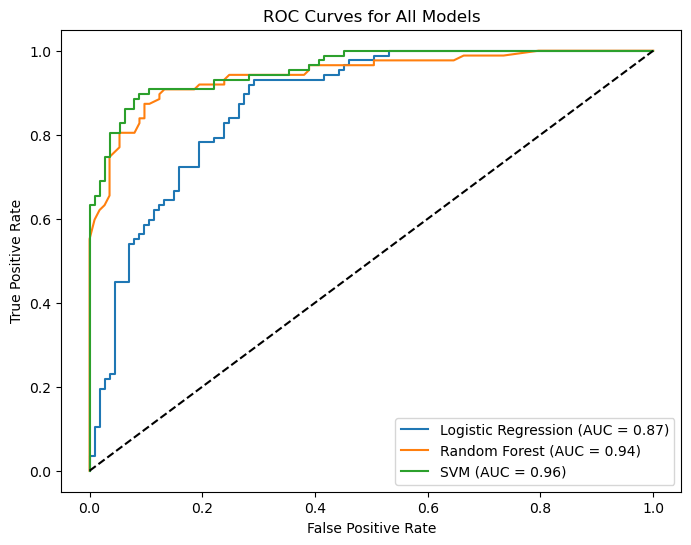

In [13]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

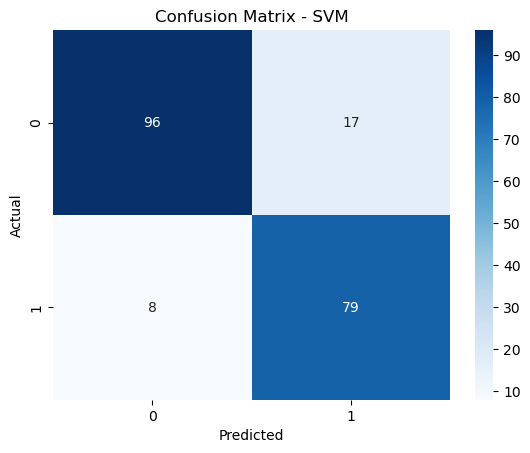

In [14]:
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

In [ ]:
#step 11
#MODEL OPTIMIZATION
#RE TRAIN best model and evaluate again
#feature important visualisation

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.3f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.911


In [16]:
best_rf = grid_search.best_estimator_

best_preds = best_rf.predict(X_test)
best_probs = best_rf.predict_proba(X_test)[:, 1]

print("\nOptimized Random Forest Performance:")
print(classification_report(y_test, best_preds))
print(f"AUC Score: {roc_auc_score(y_test, best_probs):.3f}")


Optimized Random Forest Performance:
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       113
           1       0.77      0.91      0.84        87

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.86      0.84      0.85       200

AUC Score: 0.939


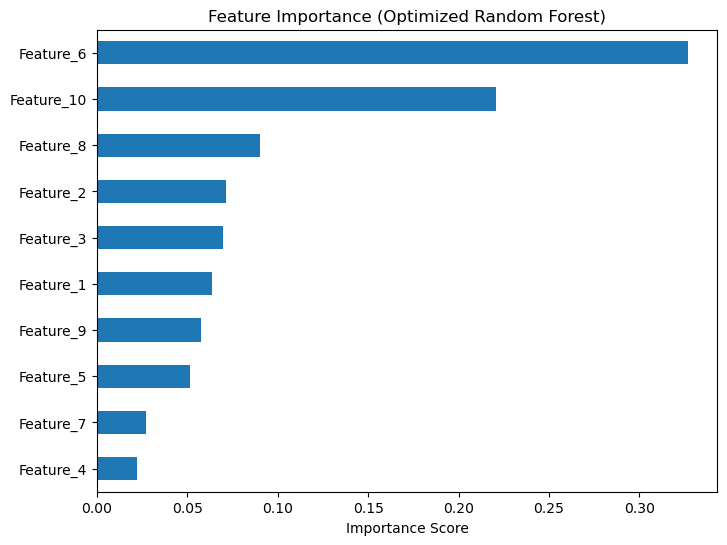

In [17]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance (Optimized Random Forest)')
plt.xlabel('Importance Score')
plt.show()

In [ ]:
#step 12
#OUTLIER detection and normal distribution conversion
#remove or clip outliers

               Feature  Outlier_Count
Feature_1    Feature_1              8
Feature_4    Feature_4              4
Feature_2    Feature_2              3
Feature_5    Feature_5              3
Feature_9    Feature_9              2
Feature_3    Feature_3              1
Feature_6    Feature_6              1
Feature_7    Feature_7              1
Feature_8    Feature_8              1
Feature_10  Feature_10              1


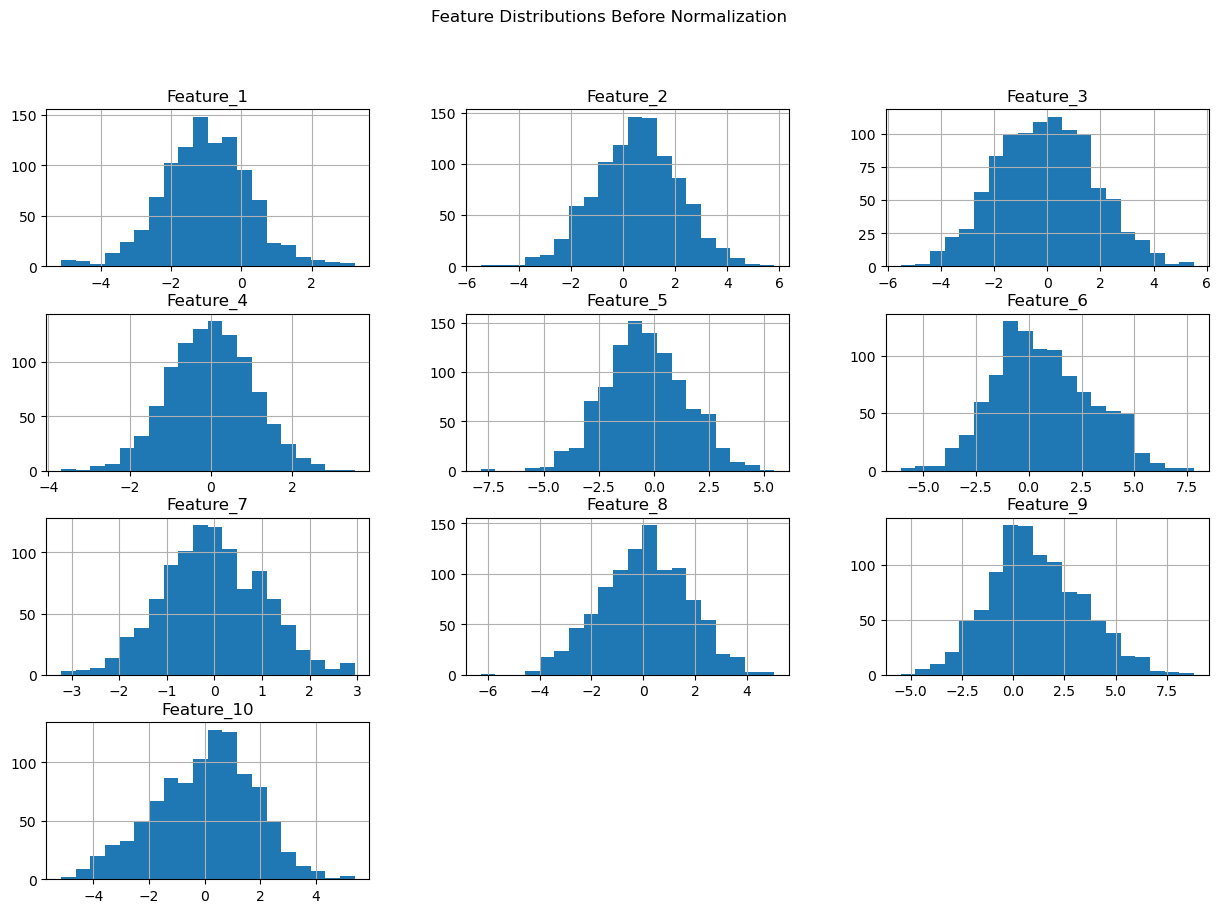

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

z_scores = np.abs(stats.zscore(X))
outliers = (z_scores > 3).sum(axis=0)

outlier_summary = pd.DataFrame({
    'Feature': X.columns,
    'Outlier_Count': outliers
}).sort_values(by='Outlier_Count', ascending=False)

print(outlier_summary)

X.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions Before Normalization")
plt.show()

In [ ]:
#step 13
#confirm statistical normality
#check skewness

In [19]:
skew_before = X.skew().mean()
skew_after = X_scaled.skew().mean()

print(f"Average Skewness Before Normalization: {skew_before:.3f}")
print(f"Average Skewness After Normalization: {skew_after:.3f}")

Average Skewness Before Normalization: 0.016
Average Skewness After Normalization: 0.016
